In [2]:
!pip3 install rpy2

  Using cached cffi-1.16.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata (1.5 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
  Using cached MarkupSafe-2.1.5-cp311-cp311-macosx_10_9_x86_64.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.9/299.9 kB 5.9 MB/s eta 0:00:00:00:01
Using cached cffi-1.16.0-cp311-cp311-macosx_10_9_x86_64.whl (182 kB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
Using cached MarkupSafe-2.1.5-cp311-cp311-macosx_10_9_x86_64.whl (14 kB)
Using cached pycparser-2.22-py3-none-any.whl (117 kB)


In [54]:
# R libraries
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

# Data wrangling
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def read_rda(path, r_df_name):

    # Activate the automatic conversion of R objects to pandas objects
    pandas2ri.activate()

    # Path to your .rda file
    rda_file_path = path

    # Load the .rda file
    robjects.r['load'](rda_file_path)

    # Assuming the .rda file contains a single data frame named 'df_name'
    df_name = r_df_name

    # Retrieve the data frame from R environment
    r_dataframe = robjects.r[df_name]

    # Convert R data frame to pandas DataFrame
    try:
        pandas_dataframe = pandas2ri.rpy2py(r_dataframe)
    except TypeError as e:
        print("TypeError encountered:", e)
        # Attempt a manual conversion or inspect data structure
        pandas_dataframe = pd.DataFrame({key: list(val) for key, val in r_dataframe.items()})

    return pandas_dataframe

In [42]:
def harmonize_df(df, city_name, main_street_name):
    
    df.drop(columns = ['LONGITUDE', 'LATITUDE', 'geometry'], inplace = True)
    df['CITY'] = city_name
    main_street_dist = 'DISTANCE_TO_' + main_street_name
    df.rename(columns = {main_street_dist:'DISTANCE_TO_MAIN'}, inplace = True)

    return df

## Read and process data

In [43]:
df_mad = read_rda('../data-raw/Madrid_Sale.RData', 'Madrid_Sale')
df_mad = harmonize_df(df_mad, 'MADRID', 'CASTELLANA')

df_bcn = read_rda('../data-raw/Barcelona_Sale.RData', 'Barcelona_Sale')
df_bcn = harmonize_df(df_bcn, 'BARCELONA', 'DIAGONAL')

df_val = read_rda('../data-raw/Valencia_Sale.RData', 'Valencia_Sale')
df_val = harmonize_df(df_val, 'VALENCIA', 'BLASCO')

assert df_val.columns.all() == df_bcn.columns.all() == df_mad.columns.all()

TypeError encountered: 'NULLType' object is not iterable
TypeError encountered: 'NULLType' object is not iterable
TypeError encountered: 'NULLType' object is not iterable


In [85]:
df = pd.concat([df_val, df_bcn, df_mad], axis = 0)
df.head()

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_MAIN,CITY
0,27088,201812,111000.0,1480.000000,75,2,1,1,1,1,...,7,35,6,0,0,1,3.759093,0.756517,3.373132,VALENCIA
1,6306,201812,169000.0,1320.312500,128,4,2,0,1,1,...,7,56,5,0,0,1,2.073773,0.370680,0.540594,VALENCIA
2,24353,201812,162000.0,1883.720930,86,2,1,0,1,1,...,6,20,4,0,0,1,2.099641,0.038560,0.719203,VALENCIA
3,8874,201812,199000.0,1792.792793,111,4,2,0,1,0,...,8,25,5,0,0,1,2.120917,0.524827,0.915379,VALENCIA
4,24135,201812,73000.0,1303.571429,56,3,1,1,1,0,...,6,20,8,0,0,1,3.087950,1.129985,2.009535,VALENCIA


## Visualise

Text(0.5, 1.0, 'Madrid')

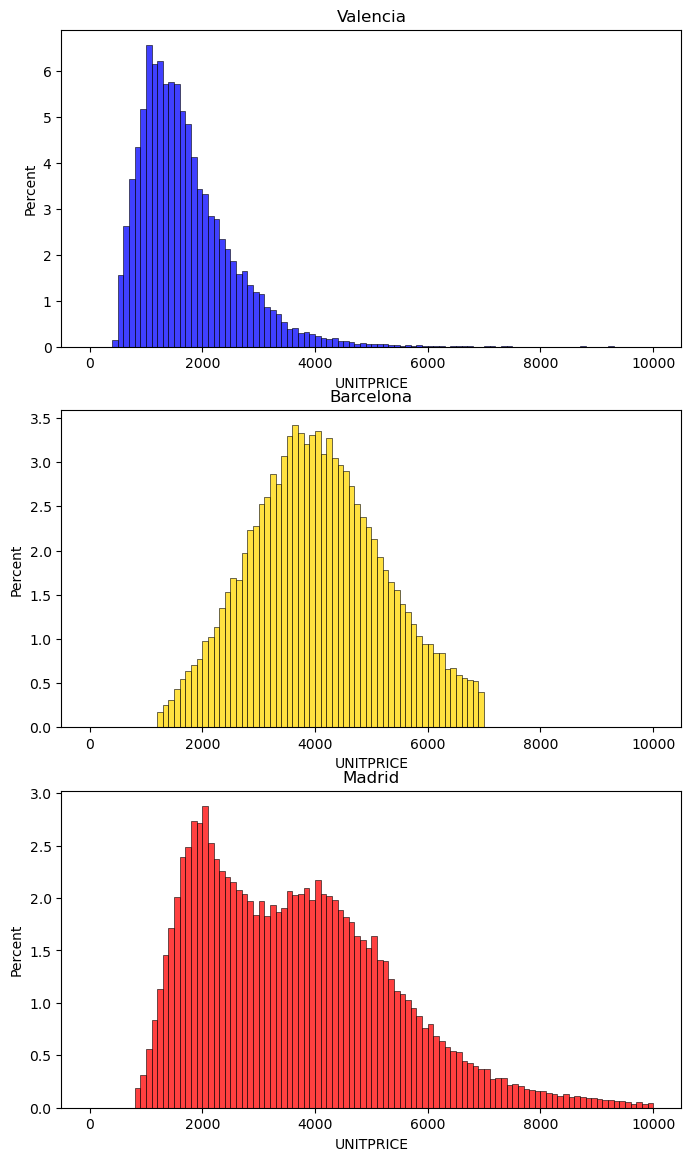

In [81]:
# Histograms

fig, ax = plt.subplots(3, 1, figsize = (8,14))

sns.histplot(df_val['UNITPRICE'], ax=ax[0], color = 'blue', stat = 'percent', binrange = (0,10000), binwidth=100)
ax[0].set_title('Valencia')
sns.histplot(df_bcn['UNITPRICE'], ax=ax[1], color = 'gold', stat = 'percent', binrange = (0,10000), binwidth=100)
ax[1].set_title('Barcelona')
sns.histplot(df_mad['UNITPRICE'], ax=ax[2], color = 'red', stat = 'percent', binrange = (0,10000), binwidth=100)
ax[2].set_title('Madrid')


In [75]:
df_val.columns

Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
       'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'AMENITYID', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'PARKINGSPACEPRICE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL',
       'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CONSTRUCTIONYEAR', 'FLOORCLEAN', 'FLATLOCATIONID',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_MAIN',
       'CITY'],
      dtype='object')